Threshold of ostu method:206
Threshold of hsv method:110


True

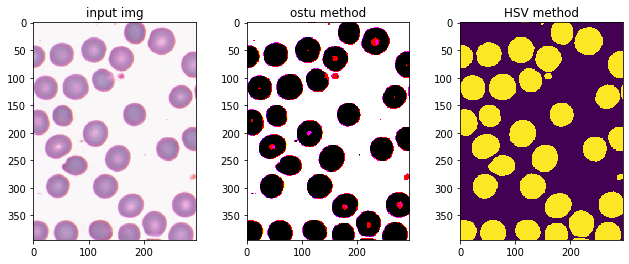

In [98]:
#question 1
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import  Counter

#read the c2 image.
img = cv2.imread('c4.jpg',1)
#print(img.shape)
shape_1=img.shape[0]
shape_2=img.shape[1]
shape_3=img.shape[2]

#flatten image
def get_flatten(img):
    return img.flatten()
#get frequency of each pixel.
def get_fre(img_02):
    #img_02=img.flatten()
    fre=Counter(img_02)
    whole=len(img_02)
    for k,v  in fre.items():
        fre[k]=fre[k]/whole
    return fre

img_02=get_flatten(img)
fre=get_fre(img_02)
fre=dict(fre)

#get mean intensity of the image.
def mean_intensity_cal(fre):
    mean_intensity=0
    for k,v in fre.items():
        mean_intensity=mean_intensity+k*v
    return mean_intensity
mean_intensity=mean_intensity_cal(fre)
#print(mean_intensity)

def get_variences(fre,mean_intensity):
    #get mean of k+1-256
    def get_mean_256(k_01,fre,pro):
        mean_k=0
        for i in range(k_01,256):
            if i in fre:
                mean_k=mean_k+i*fre[i]
        if (1-pro)==0:
            mean_k=0
        else:
            mean_k=mean_k/(1-pro)
        return 1-pro,mean_k

#get mean of 0-k
    def get_mean_k(k,fre):
        pro=0
        mean_k=0
        for i in range(0,k+1):
            if i in fre:
                pro+=fre[i]
                mean_k+=i*fre[i]
        if pro==0:
            mean_k=0
        else:
            mean_k=mean_k/pro
        return pro,mean_k

    variences={}
    for i in range(1,255):
        #print(i)
        sum_p1,m1=get_mean_k(i,fre)
        sum_p2,m2=get_mean_256(i+1,fre,sum_p1)
        variences[i]=sum_p1*(m1-mean_intensity)**2+sum_p2*(m2-mean_intensity)**2
        variences_01=sorted(variences.items(),key=lambda x:x[1],reverse=True)
    return variences_01[0][0]
variences_01=get_variences(fre,mean_intensity)
print(f'Threshold of ostu method:{variences_01}')

def reshape_img_3d(img_02,shape_1,shape_2,shape_3):
    img_03=np.array(img_02)
    img_03=img_03.reshape((shape_1,shape_2,shape_3))
    return img_03

def reshape_img_2d(img_02,shape_1,shape_2):
    img_03=np.array(img_02)
    img_03=img_03.reshape((shape_1,shape_2))
    return img_03

#generate a binary image with the background encoded as black [pixel value: 0] and the cell as white [pixel value: 255].
def classify_img(img_02,mean_intensity):
    for i in range(len(img_02)):
        if img_02[i]<=mean_intensity:
            img_02[i]=0
        else:
            
            img_02[i]=255
    return img_02

#hsv method
def rgb2hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    #print(r,g,b)
    mx = max(r, g, b)
    mn = min(r, g, b)
    m = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        if g >= b:
            h = ((g-b)/m)*60
        else:
            h = ((g-b)/m)*60 + 360
    elif mx == g:
        h = ((b-r)/m)*60 + 120
    elif mx == b:
        h = ((r-g)/m)*60 + 240
    if mx == 0:
        s = 0
    else:
        s = m/mx
    v = mx
    H = h / 2
    S = s * 255.0
    V = v * 255.0
    return H, S, V

#HSV space method
hsv_matrix=np.zeros((img.shape[0],img.shape[1],img.shape[2]),dtype=float)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r=img[i][j][0]
        g=img[i][j][1]
        b=img[i][j][2]
        H,S,V=rgb2hsv(r, g, b)
        hsv_matrix[i][j][0]=H
        hsv_matrix[i][j][1]=S
        hsv_matrix[i][j][2]=V

# S channel
hsv_s=hsv_matrix[:,:,1]
img_hsv_s=get_flatten(hsv_s)
fre_02=get_fre(img_hsv_s)
fre_02=dict(fre_02)
mean_intensity_s=mean_intensity_cal(fre_02)

variences_02=get_variences(fre_02,mean_intensity_s)
print(f'Threshold of hsv method:{variences_02}')

#HSV space method using channel s()
#reshape img 
img_s=classify_img(img_hsv_s,mean_intensity_s)
img_s=reshape_img_2d(img_hsv_s,shape_1,shape_2)
img_s = img_s.astype(int)
#img_s.dtype ='int64'

#OSTU method
#Classify image
img_03=classify_img(img_02,mean_intensity)
img_03=reshape_img_3d(img_02,shape_1,shape_2,shape_3)

plt.figure()
#input image
plt.subplots_adjust(left=0.1, bottom=None, right=1.5, top=None,
                wspace=None, hspace=None)
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('input img')
#OSTU method
plt.subplot(1,3,2)
plt.imshow(img_03)
plt.title('ostu method')
#HSV space method,using channel S.
plt.subplot(1,3,3)
plt.imshow(img_s)
plt.title('HSV method')
cv2.imwrite('image_task1.jpg',img_s)

Text(0.5, 1.0, 'number of cells :31')

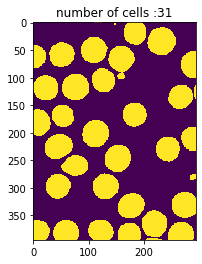

In [99]:
#Question2
from PIL import Image
#img_s=cv2.imread('image_task1.jpg',0)
#Meaian filter
def BetterMedianFilter(imarray, k = 3, padding = None):
 
	#imarray = np.array(Image.open(src))
	height, width = imarray.shape
 
	if not padding:
		edge = int((k-1)/2)
		if height - 1 - edge <= edge or width - 1 - edge <= edge:
			print("The parameter k is to large.")
			return None
		new_arr = np.zeros((height, width), dtype = "uint8")
		for i in range(height):
			for j in range(width):
				if i <= edge - 1 or i >= height - 1 - edge or j <= edge - 1 or j >= height - edge - 1:
					new_arr[i, j] = imarray[i, j]
				else:
					#nm:neighbour matrix
					nm = imarray[i - edge:i + edge + 1, j - edge:j + edge + 1]
					max = np.max(nm)
					min = np.min(nm)
					if imarray[i, j] == max or imarray[i, j] == min:
						new_arr[i, j] = np.median(nm)
					else:
						new_arr[i, j] = imarray[i, j]
		#new_im = Image.fromarray(new_arr) 
		#print(set(new_arr.flatten()))
		#plt.imshow(new_arr)
		return new_arr

#find father and update
def find_fa(x):
    global count,fa,cc

    fx = fa[x]
    if fa[fx] == fx:#if father has no father, no more search
        return fx
    else:#update x's father
        fa[x] = find_fa(fx)
        return fa[x]

#two-pass connected component labelling algorithm
def two_pass(img, mask, min_area,overlap_area):
    #init merge and find set
    global count,fa,cc

    fa = list(range(img.shape[0]*img.shape[1])) #father node
    cc = np.zeros(img.shape[0]*img.shape[1]) #count connected components area of fa[]
    cc = cc+1

    dx = [0,0,-1,1]
    dy = [-1,1,0,0]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == mask:
                for dir in range(4):
                    nx = dx[dir] + i
                    ny = dy[dir] + j
                    if nx >= 0 and nx < img.shape[0] and ny >= 0 and ny < img.shape[1] and img[nx,ny] == mask:
                        a = i*img.shape[1]+j
                        b = nx*img.shape[1]+ny
                        pa = find_fa(a)#shorten chain
                        pb = find_fa(b)#
                        #merge father
                        if pa<pb:
                            fa[pb]=pa
                            cc[pa]+=cc[pb]
                            cc[pb]=0
                        elif pa>pb:
                            fa[pa]=pb
                            cc[pb]+=cc[pa]
                            cc[pa]=0

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == mask:
                a = i*img.shape[1]+j
                find_fa(a)

    count = 0
    colormap = np.zeros((img.shape[0],img.shape[1],3))#color hash table
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == mask:
                a = i*img.shape[1]+j
                pa = find_fa(a)
                if  overlap_area>=cc[pa] >= min_area: # connected components with area >= 100 pixel
                    pa_i = pa //img.shape[1]
                    pa_j = pa % img.shape[1]
                    if np.max(colormap[pa_i,pa_j,:]) == 0:
                        colormap[pa_i,pa_j,:] = np.random.randint(256,size=3)
                        count += 1
                    colormap[i,j,:] = colormap[pa_i,pa_j,:]
    #print (count)
    return count
img_count=BetterMedianFilter(img_s)#image from task 1.
plt.imshow(img_count)
plt.title(f'number of cells :{two_pass(img_count, 255, 100,8000)}')